In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
import cv2

from PIL import Image

from tensorflow import keras  
import tensorflow.keras.layers as k

from tqdm import tqdm


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img

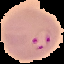

In [3]:
load_img(r"C:\Users\harme\Documents\GitHub\Malaria-cell-Detection\dataset\Malarial Cell Image Data\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png", target_size=(64,64))

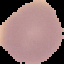

In [4]:
load_img(r"C:\Users\harme\Documents\GitHub\Malaria-cell-Detection\dataset\Malarial Cell Image Data\cell_images\Uninfected\C1_thinF_IMG_20150604_104722_cell_9.png",target_size=(64,64))

In [5]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [6]:
path = "C:\\Users\\harme\\Documents\\GitHub\\Malaria-cell-Detection\\dataset\\Malarial Cell Image Data\\cell_images\\Parasitized\\"
size = 64
dataset = []
label = []

In [7]:
parasitized_img = os.listdir(path)


In [8]:
for i, image_name in enumerate(tqdm(parasitized_img)):
    if (image_name.split('.')[1] == "png"):
        image = cv2.imread(path+image_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(0)
        

100%|██████████| 13800/13800 [00:25<00:00, 533.91it/s]


In [9]:
len(dataset), len(label)

(13799, 13799)

In [10]:
unin_path = "C:\\Users\\harme\\Documents\\GitHub\\Malaria-cell-Detection\\dataset\\Malarial Cell Image Data\\cell_images\\Uninfected\\"

In [11]:
uninffected_img = os.listdir(unin_path)


In [12]:
for i, image_name in enumerate(tqdm(uninffected_img)):
    if (image_name.split('.')[1] == "png"):
        image = cv2.imread(unin_path+image_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(1)
        

100%|██████████| 4133/4133 [00:15<00:00, 271.28it/s]


In [13]:
len(uninffected_img)

4133

In [14]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [15]:
x_train, x_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size=0.2, random_state=0)

In [16]:
INPUT_SHAPE = (size,size,3)
input = k.Input(shape=INPUT_SHAPE)
conv1 = k.Conv2D(32,kernel_size= (3,3), activation= "relu", padding="same")(input)
pool1 = k.MaxPool2D(pool_size= (2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate= 0.2)(norm1)

conv2 = k.Conv2D(32,kernel_size= (3,3), activation= "relu", padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size= (2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate= 0.2)(norm2)

conv3 = k.Conv2D(32,kernel_size= (3,3), activation= "relu", padding="same")(drop2)
pool3 = k.MaxPool2D(pool_size= (2,2))(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate= 0.2)(norm3)

flat = k.Flatten()(drop3)

hidden1 = k.Dense(512, activation="relu")(flat)
norm4 = k.BatchNormalization(axis= -1)(hidden1)
drop4 = k.Dropout(rate = 0.2)(norm4)

hidden2 = k.Dense(256, activation="relu")(drop4)
norm5 = k.BatchNormalization(axis= -1)(hidden2)
drop5 = k.Dropout(rate = 0.2)(norm5)

out = k.Dense(2, activation='sigmoid')(norm5)


In [17]:
model = keras.Model(inputs = input, outputs = out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,203,778 (4.59 MB)

 Trainable params: 1,202,050 (4.59 MB)

 Non-trainable params: 1,728 (6.75 KB)

None


In [18]:
history = model.fit(np.array(x_train), y_train, batch_size= 64, verbose=1, epochs = 15, validation_split=0.1, shuffle= False)

Epoch 1/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.6861 - loss: 0.6782 - val_accuracy: 0.4794 - val_loss: 2.1694
Epoch 2/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.9002 - loss: 0.2371 - val_accuracy: 0.8474 - val_loss: 0.5188
Epoch 3/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9328 - loss: 0.1667 - val_accuracy: 0.9247 - val_loss: 0.2052
Epoch 4/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.9445 - loss: 0.1366 - val_accuracy: 0.9192 - val_loss: 0.2612
Epoch 5/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9537 - loss: 0.1194 - val_accuracy: 0.9296 - val_loss: 0.1617
Epoch 6/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - accuracy: 0.9565 - loss: 0.1062 - val_accuracy: 0.9101 - val_loss: 0.1894
Epoch 7/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 25s 124ms/step - accuracy: 0.9648 - loss: 0.0946 - val_accuracy: 0.9463 - val_loss: 0.2029
Epoch 8/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.9652 - loss: 0.089

In [19]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test),np.array(y_test))[1]*100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9365 - loss: 0.2080
Test_Accuracy: 93.84%
